In [1]:
#include libraries
import csv # to open/close/append CSV
import os # to check if file exists
import nltk #natural language toolkit
import pandas as pd
import numpy as np
from datetime import datetime
import re
from collections import Counter, defaultdict 
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
file_exists = os.path.isfile('/Users/boris/Downloads/dice_com-job_us_sample.csv')



# loop to check if file exists
if file_exists == 0:
    print('Error: dice_com-job_us_sample.csv does not exist!')
elif file_exists == 1:
    try:
        CSV_file = pd.read_csv('/Users/boris/Downloads/dice_com-job_us_sample.csv', sep=',', header='infer')
        print('Exists, and file is ok.')
    except Exception as e:
        Date_Advertised = None
        print('Exists, but failed to open.')

Exists, and file is ok.


In [15]:
print('Please enter a job to search for: ')
userInput = "java developer" #input()#'account'
print(userInput)

Please enter a job to search for: 
java developer


In [16]:
userInput = str.lower(userInput)
CSV_file2 = CSV_file.apply(lambda x: x.astype(str).str.lower())
CSV_file2 = CSV_file2[CSV_file2['jobtitle'].str.contains(userInput)] #case sensitive copy only matching rows


In [5]:
CSV_file2

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
249,https://www.dice.com/jobs/detail/python-%2526%...,"sis-systems integration solutions, inc.",market,**local candidate only please onsite interview...,dice id : sis,"sunnyvale, ca",python / django developer,5 hours ago,nan,www.dice.com,"contract w2, 12-24 months",c353b8b1bb3e98475262b566dc8e8790
266,https://www.dice.com/jobs/detail/senior-python...,the armada group,"contract independent, 6 month cth",we are seeking an experienced back-end develop...,dice id : armada,"sunnyvale, ca",senior python developer,5 hours ago,telecommuting not available|travel not required,www.dice.com,5+ years of experience designing and deliverin...,af7cee118bb4f7dbdcd7c44f8515dc42
270,https://www.dice.com/jobs/detail/cloud-infrast...,"trigyn technologies, inc.","contract corp-to-corp, contract independent, c...",trigyn's direct financial client has an immedi...,dice id : trinj,"montreal, qc",cloud infrastructure developer (python),5 hours ago,telecommuting not available|travel not required,www.dice.com,see job description,7d3e47f035cec4c3941937ad524c0d0c
341,https://www.dice.com/jobs/detail/telecommute-b...,cybercoders,"full time, full-time, employee","minimum required skills:python, spark, apache ...",dice id : cybercod,"south windsor, ct",telecommute backend software engineer - (pytho...,23 hours ago,telecommuting not available|travel not required,www.dice.com,"python, spark, apache spark, cassandra, scala,...",a9ced403587b3bef3a0a20f46be23a54
342,https://www.dice.com/jobs/detail/elixir-engine...,cybercoders,"full time, full-time, employee","minimum required skills:elixir, python, ruby o...",dice id : cybercod,"boston, ma","elixir engineer - elixir, python, ruby on rails",24 hours ago,telecommuting not available|travel not required,www.dice.com,"elixir, python, ruby on rails - elixir, python...",054b28c5166a8f0abc3f54c4475a4e3c
382,https://www.dice.com/jobs/detail/senior-back-e...,cybercoders,"full time, full-time, employee","minimum required skills:python, big data proce...",dice id : cybercod,"boston, ma","senior back end developer - python, big data p...",24 hours ago,telecommuting not available|travel not required,www.dice.com,"python, big data processing, (kafka/spark/stor...",942474e5d4010d55728790cf651d8898
472,https://www.dice.com/jobs/detail/senior-python...,cybercoders,"full time, full-time, employee","minimum required skills:django, javascript fra...",dice id : cybercod,"dover, ma",senior python/django engineer- remote 3 days a...,24 hours ago,telecommuting not available|travel not required,www.dice.com,"django, javascript frameworks, python - django...",1e0505fa37b016ae1b17991956fe0bff
515,https://www.dice.com/jobs/detail/principal-sof...,cybercoders,"full time, full-time, employee","minimum required skills:javascript, python, ru...",dice id : cybercod,"boston, ma","principal software engineer - javascript, pyth...",23 hours ago,telecommuting not available|travel not required,www.dice.com,"javascript, python, ruby on rails, aws - javas...",f84fd31a34dd81ec94b594c20eae908f
1449,https://www.dice.com/jobs/detail/performance-q...,progressive technology solutions,"contract w2, contract or fulltime",interested candidates submit your resume to pr...,dice id : 10125813,"waltham, ma",performance qa engineer (python/java/perl),3 weeks ago,telecommuting not available|travel not required,www.dice.com,qa test python load testing performance testin...,6c206aef474367888db5ad75afde2b5d
1459,https://www.dice.com/jobs/detail/python-develo...,execu/search group,full time,a saas firm in boston that specializes in...,dice id : execusch,"boston, ma",python developer,1 week ago,telecommuting not available|travel not required,www.dice.com,3+ years of software development experience,bdb8ee5495229fef066496fe56e7b3cd


In [6]:
CSV_file2['jobid'] = CSV_file2['jobid'].map(lambda x: x.lstrip('dice id :'))

In [7]:
CSV_file2

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
249,https://www.dice.com/jobs/detail/python-%2526%...,"sis-systems integration solutions, inc.",market,**local candidate only please onsite interview...,sis,"sunnyvale, ca",python / django developer,5 hours ago,nan,www.dice.com,"contract w2, 12-24 months",c353b8b1bb3e98475262b566dc8e8790
266,https://www.dice.com/jobs/detail/senior-python...,the armada group,"contract independent, 6 month cth",we are seeking an experienced back-end develop...,armada,"sunnyvale, ca",senior python developer,5 hours ago,telecommuting not available|travel not required,www.dice.com,5+ years of experience designing and deliverin...,af7cee118bb4f7dbdcd7c44f8515dc42
270,https://www.dice.com/jobs/detail/cloud-infrast...,"trigyn technologies, inc.","contract corp-to-corp, contract independent, c...",trigyn's direct financial client has an immedi...,trinj,"montreal, qc",cloud infrastructure developer (python),5 hours ago,telecommuting not available|travel not required,www.dice.com,see job description,7d3e47f035cec4c3941937ad524c0d0c
341,https://www.dice.com/jobs/detail/telecommute-b...,cybercoders,"full time, full-time, employee","minimum required skills:python, spark, apache ...",ybercod,"south windsor, ct",telecommute backend software engineer - (pytho...,23 hours ago,telecommuting not available|travel not required,www.dice.com,"python, spark, apache spark, cassandra, scala,...",a9ced403587b3bef3a0a20f46be23a54
342,https://www.dice.com/jobs/detail/elixir-engine...,cybercoders,"full time, full-time, employee","minimum required skills:elixir, python, ruby o...",ybercod,"boston, ma","elixir engineer - elixir, python, ruby on rails",24 hours ago,telecommuting not available|travel not required,www.dice.com,"elixir, python, ruby on rails - elixir, python...",054b28c5166a8f0abc3f54c4475a4e3c
382,https://www.dice.com/jobs/detail/senior-back-e...,cybercoders,"full time, full-time, employee","minimum required skills:python, big data proce...",ybercod,"boston, ma","senior back end developer - python, big data p...",24 hours ago,telecommuting not available|travel not required,www.dice.com,"python, big data processing, (kafka/spark/stor...",942474e5d4010d55728790cf651d8898
472,https://www.dice.com/jobs/detail/senior-python...,cybercoders,"full time, full-time, employee","minimum required skills:django, javascript fra...",ybercod,"dover, ma",senior python/django engineer- remote 3 days a...,24 hours ago,telecommuting not available|travel not required,www.dice.com,"django, javascript frameworks, python - django...",1e0505fa37b016ae1b17991956fe0bff
515,https://www.dice.com/jobs/detail/principal-sof...,cybercoders,"full time, full-time, employee","minimum required skills:javascript, python, ru...",ybercod,"boston, ma","principal software engineer - javascript, pyth...",23 hours ago,telecommuting not available|travel not required,www.dice.com,"javascript, python, ruby on rails, aws - javas...",f84fd31a34dd81ec94b594c20eae908f
1449,https://www.dice.com/jobs/detail/performance-q...,progressive technology solutions,"contract w2, contract or fulltime",interested candidates submit your resume to pr...,10125813,"waltham, ma",performance qa engineer (python/java/perl),3 weeks ago,telecommuting not available|travel not required,www.dice.com,qa test python load testing performance testin...,6c206aef474367888db5ad75afde2b5d
1459,https://www.dice.com/jobs/detail/python-develo...,execu/search group,full time,a saas firm in boston that specializes in...,xecusch,"boston, ma",python developer,1 week ago,telecommuting not available|travel not required,www.dice.com,3+ years of software development experience,bdb8ee5495229fef066496fe56e7b3cd


In [8]:
from nltk.corpus import stopwords

In [17]:
stop_words = set(stopwords.words('english'))
CSV_file2['Job_Description_Without_Stopwords'] = CSV_file2['jobdescription'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
CSV_file2['Job_Skills_Without_Stopwords'] = CSV_file2['skills'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))



#regular expresion in wich we swap all special charachters with a blank and all numbers with a blank also
def clean_string(strings):
    result = []
    for value in strings:
        value = value.strip()
        value = re.sub('([!?\',*+.$-/])',' ', value)
        value = re.sub("\d+", "", value)
        result.append(value)
    return result

# creates list where each document is an element
CSV_file2['Job_Description_Without_Stopwords'] = clean_string(CSV_file2['Job_Description_Without_Stopwords'])
CSV_file2['Job_Skills_Without_Stopwords'] = clean_string(CSV_file2['Job_Skills_Without_Stopwords'])

In [18]:
bigram_list = []
for index, row in CSV_file2.iterrows():
    bigram_list = bigram_list + [b for b in nltk.bigrams(row['Job_Description_Without_Stopwords'].split())]

# Bi-gram Term Frequency =======================================================================================================================================================================
bigram_tf = Counter(bigram_list) # list all bigram TF
bigram_tf_df = pd.DataFrame.from_dict(bigram_tf, orient='index').reset_index() #turn class collections.Counter into Pandas DataFrame
bigram_tf_df = bigram_tf_df.rename(columns={'index':'index2', 0:'count'}) #index is immutable tuple and will need to be changed to list/string and cleaned to allow combining with IDF dataframe

index_list = []
for index, row in bigram_tf_df.iterrows():
    index_list.append(str(row[0][0]) + ' ' + str(row[0][1]))

bigram_tf_df['index'] = index_list
bigram_tf_df = bigram_tf_df.drop(['index2'], axis=1) # delete bigram tuple column
bigram_tf_df = bigram_tf_df.sort_values(by='count', ascending=False) #sort based on vec_sum

# Bi-gram Inverse-Document Frequency ===========================================================================================================================================================
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2,3), min_df = 0, max_df = 0.3, stop_words = 'english')
TFIDF_terms = vectorizer.fit_transform(CSV_file2['Job_Description_Without_Stopwords']).toarray()
TFIDF_df = pd.DataFrame(TFIDF_terms, columns=vectorizer.get_feature_names()) #pull terms into a dataframe
IDF_df = TFIDF_df.T.reset_index() # rotate DataFrame
IDF_df[IDF_df.columns[::-1]]
IDF_df['vec_sum'] = IDF_df.sum(axis=1) #add column which is a sum of all other columns
IDF_df = IDF_df.sort_values(by='vec_sum', ascending=False) #sort based on vec_sum
IDF_TF = pd.DataFrame()
IDF_TF = IDF_df[['index', 'vec_sum']].copy() #copy only the index and vector sum to the new dataframe

# PRINT lists ==================================================================================================================================================================================
print('\nTop skills for your searched job based on Term Frequency are:\n', bigram_tf_df.head(n=20)) # print dataframe

print('\n\nTop skills for your searched job based on addition of Inverse-Document Frequency are: \n', IDF_TF.head(n=20))# print only index and vec_sum


Top skills for your searched job based on Term Frequency are:
       count                    index
42      533           java developer
696     370         years experience
653     296             web services
9       263     software development
1387    241                 java jee
186     236         computer science
431     186   development experience
151     183                core java
1585    176          experience java
191     174                   and or
2952    162          design patterns
2949    161          object oriented
894     156  application development
185     147          degree computer
773     145       design development
598     139     communication skills
1160    136       experience working
2771    135    experience developing
2485    121             • experience
440     115              senior java


Top skills for your searched job based on addition of Inverse-Document Frequency are: 
                           index   vec_sum
135532             web serv

In [19]:
bigram_list = []
for index, row in CSV_file2.iterrows():
    bigram_list = bigram_list + [b for b in nltk.bigrams(row['Job_Skills_Without_Stopwords'].split())]

# Bi-gram Term Frequency =======================================================================================================================================================================
bigram_tf = Counter(bigram_list) # list all bigram TF
bigram_tf_df = pd.DataFrame.from_dict(bigram_tf, orient='index').reset_index() #turn class collections.Counter into Pandas DataFrame
bigram_tf_df = bigram_tf_df.rename(columns={'index':'index2', 0:'count'}) #index is immutable tuple and will need to be changed to list/string and cleaned to allow combining with IDF dataframe

index_list = []
for index, row in bigram_tf_df.iterrows():
    index_list.append(str(row[0][0]) + ' ' + str(row[0][1]))

bigram_tf_df['index'] = index_list
bigram_tf_df = bigram_tf_df.drop(['index2'], axis=1) # delete bigram tuple column
bigram_tf_df = bigram_tf_df.sort_values(by='count', ascending=False) #sort based on vec_sum

# Bi-gram Inverse-Document Frequency ===========================================================================================================================================================
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2,2), min_df = 0, stop_words = 'english')
tfidf_matrix = vectorizer.fit_transform(CSV_file2['Job_Skills_Without_Stopwords']) #ovo sam dodao za testiranje
TFIDF_terms = vectorizer.fit_transform(CSV_file2['Job_Skills_Without_Stopwords']).toarray()
TFIDF_df = pd.DataFrame(TFIDF_terms, columns=vectorizer.get_feature_names()) #pull terms into a dataframe
IDF_df = TFIDF_df.T.reset_index() # rotate DataFrame
IDF_df[IDF_df.columns[::-1]]
IDF_df['vec_sum'] = IDF_df.sum(axis=1) #add column which is a sum of all other columns
IDF_df = IDF_df.sort_values(by='vec_sum', ascending=False) #sort based on vec_sum
IDF_TF = pd.DataFrame()
IDF_TF = IDF_df[['index', 'vec_sum']].copy() #copy only the index and vector sum to the new dataframe

# PRINT lists ==================================================================================================================================================================================
print('\nTop skills for your searched job based on Term Frequency are:\n', bigram_tf_df.head(n=20)) # print dataframe

print('\n\nTop skills for your searched job based on addition of Inverse-Document Frequency are: \n', IDF_TF.head(n=20))# print only index and vec_sum


Top skills for your searched job based on Term Frequency are:
      count                  index
205    136               java jee
5       97              core java
182     81           web services
6       75         java developer
293     61       spring hibernate
24      58            java spring
200     51             jee spring
109     29        java javascript
73      27  developer development
194     27             angular js
211     24             spring mvc
710     21        design patterns
504     20               java sql
213     19               html css
108     19               jee java
225     19                 pl sql
488     18        object oriented
25      18       spring framework
176     16              soap rest
282     15             full stack


Top skills for your searched job based on addition of Inverse-Document Frequency are: 
                       index    vec_sum
1146               java jee  34.210629
1116         java developer  27.880978
401            

In [12]:
CSV_file2.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id,Job_Description_Without_Stopwords,Job_Skills_Without_Stopwords
249,https://www.dice.com/jobs/detail/python-%2526%...,"sis-systems integration solutions, inc.",market,**local candidate only please onsite interview...,sis,"sunnyvale, ca",python / django developer,5 hours ago,nan,www.dice.com,"contract w2, 12-24 months",c353b8b1bb3e98475262b566dc8e8790,local candidate please onsite interview requ...,contract w months
266,https://www.dice.com/jobs/detail/senior-python...,the armada group,"contract independent, 6 month cth",we are seeking an experienced back-end develop...,armada,"sunnyvale, ca",senior python developer,5 hours ago,telecommuting not available|travel not required,www.dice.com,5+ years of experience designing and deliverin...,af7cee118bb4f7dbdcd7c44f8515dc42,seeking experienced back end developer work cl...,years experience designing delivering scalab...
270,https://www.dice.com/jobs/detail/cloud-infrast...,"trigyn technologies, inc.","contract corp-to-corp, contract independent, c...",trigyn's direct financial client has an immedi...,trinj,"montreal, qc",cloud infrastructure developer (python),5 hours ago,telecommuting not available|travel not required,www.dice.com,see job description,7d3e47f035cec4c3941937ad524c0d0c,trigyn s direct financial client immediate ope...,see job description
341,https://www.dice.com/jobs/detail/telecommute-b...,cybercoders,"full time, full-time, employee","minimum required skills:python, spark, apache ...",ybercod,"south windsor, ct",telecommute backend software engineer - (pytho...,23 hours ago,telecommuting not available|travel not required,www.dice.com,"python, spark, apache spark, cassandra, scala,...",a9ced403587b3bef3a0a20f46be23a54,minimum required skills:python spark apache ...,python spark apache spark cassandra scala ...
342,https://www.dice.com/jobs/detail/elixir-engine...,cybercoders,"full time, full-time, employee","minimum required skills:elixir, python, ruby o...",ybercod,"boston, ma","elixir engineer - elixir, python, ruby on rails",24 hours ago,telecommuting not available|travel not required,www.dice.com,"elixir, python, ruby on rails - elixir, python...",054b28c5166a8f0abc3f54c4475a4e3c,minimum required skills:elixir python ruby r...,elixir python ruby rails elixir python r...


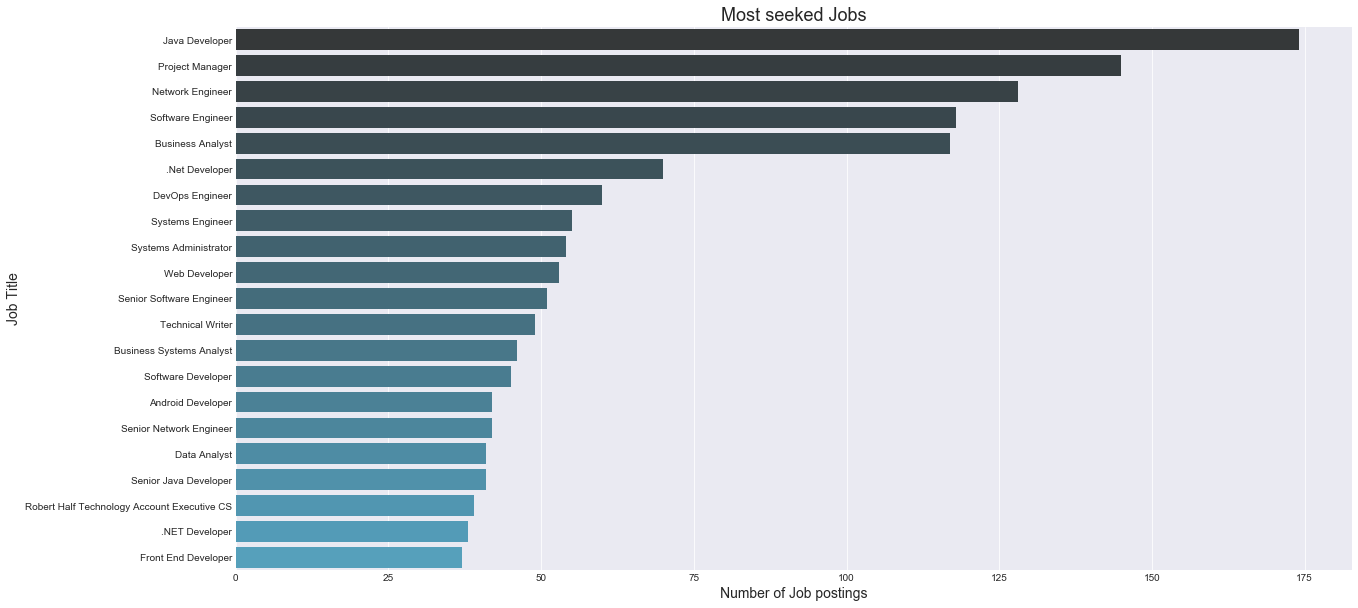

In [13]:
mypalette = sns.color_palette('GnBu_d', 40)
plt.figure(figsize=(20,10))
sns.countplot(y=CSV_file['jobtitle'], order=CSV_file['jobtitle'].value_counts().index, palette=mypalette)
plt.ylabel('Job Title', fontsize=14)
plt.xlabel('Number of Job postings', fontsize=14)
plt.title("Most seeked Jobs", fontsize=18)
plt.ylim(20.5,-0.5)
plt.show()

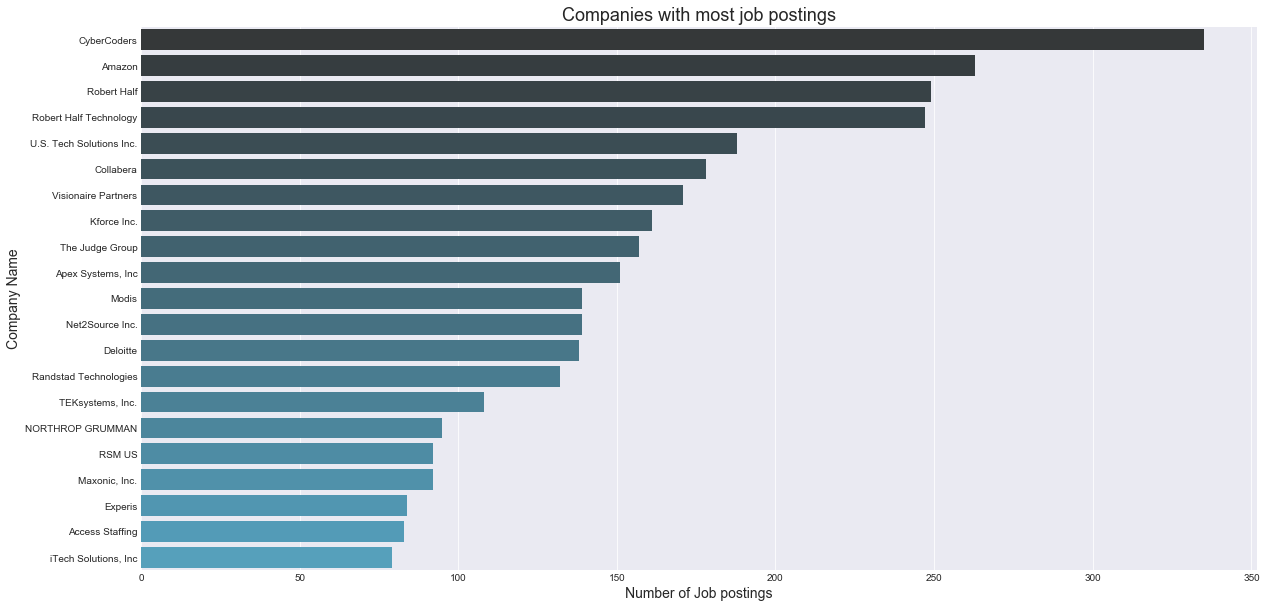

In [14]:
mypalette = sns.color_palette('GnBu_d', 40)
plt.figure(figsize=(20,10))
sns.countplot(y=CSV_file['company'], order=CSV_file['company'].value_counts().index, palette=mypalette)
plt.ylabel('Company Name', fontsize=14)
plt.xlabel('Number of Job postings', fontsize=14)
plt.title("Companies with most job postings", fontsize=18)
plt.ylim(20.5,-0.5)
plt.show()

In [20]:
bigram_tf_df.head(20)

,count,index
205,136,java jee
5,97,core java
182,81,web services
6,75,java developer
293,61,spring hibernate
24,58,java spring
200,51,jee spring
109,29,java javascript
73,27,developer development
194,27,angular js


In [21]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

 #Compute the cosine similarity matrix
#cosine_sim = linear_kernel(events2, events2)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [22]:
TFIDF_df.shape


(725, 3015)

In [23]:

# http://scikit-learn.org/stable/modules/metrics.html#linear-kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [24]:
cosine_sim[0]

array([ 1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [25]:
def get_recommendations(title):
    idx = indices[title]
    #print (idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    #print (sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    job_indices = [i[0] for i in sim_scores]
    return titles.iloc[job_indices]

In [26]:
CSV_file2 = CSV_file2.reset_index()
titles = CSV_file2['jobtitle']
indices = pd.Series(CSV_file2.index, index=CSV_file['jobtitle'])
#indices.head(2)

ValueError: Wrong number of items passed 725, placement implies 22000

In [ ]:
get_recommendations(1).head(10)

In [ ]:
CSV_file.head(30)

In [ ]:
CSV_file['skills2'] = CSV_file['jobtitle'] + CSV_file['skills']

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [27]:
CSV_file['skills'] = CSV_file['skills'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))



AttributeError: 'float' object has no attribute 'split'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2), stop_words='english')
tfidf_matrix = tf.fit_transform(CSV_file['skills2'])

In [28]:
tfidf_matrix.shape

(725, 3015)

In [29]:

# http://scikit-learn.org/stable/modules/metrics.html#linear-kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [30]:
cosine_sim[0]

array([ 1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [31]:
CSV_file2.head()

,index,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id,Job_Description_Without_Stopwords,Job_Skills_Without_Stopwords
0,3,https://www.dice.com/jobs/detail/java-develope...,transtech llc,full time,java developerfull-time/direct-hirebolingbrook...,dice id : 10113627,"bolingbrook, il","java developer (mid level)- ft- great culture,...",2 weeks ago,telecommuting not available|travel not required,nan,please see job description,3941b2f206ae0f900c4fba4ac0b18719,java developerfull time direct hirebolingbrook...,please see job description
1,37,https://www.dice.com/jobs/detail/core-java-dev...,etouch systems corp,"contract independent, contract w2, 12+ months","hi,established in 1998, etouch systems is a te...",dice id : etouch,"mountain view, ca",core java developer with distributed computing,7 hours ago,telecommuting not available|travel not required,nan,need a strong core java developer with some go...,d92f267244249065890ee6bde5275f49,hi established etouch systems technology ser...,need strong core java developer good data expe...
2,47,https://www.dice.com/jobs/detail/java-develope...,ascent,"contract independent, contract w2",job req #: 16-03602 job description: java lea...,dice id : itca001,"miami, fl",java developer (ecommerce),6 hours ago,telecommuting not available|travel not required,nan,looking for two-to-three senior java developer...,065002d37b05ad5fa6478b709b94a3a4,job req #: job description: java lead ecomme...,looking two to three senior java developers ex...
3,106,https://www.dice.com/jobs/detail/java-develope...,"trigyn technologies, inc.","contract corp-to-corp, contract independent, c...",trigyn's direct financial client has an immedi...,dice id : trinj,"montreal, qc",java developer,5 hours ago,telecommuting not available|travel not required,www.dice.com,see job description,b973f9625d5a239be48b37dad4a83eac,trigyn s direct financial client immediate ope...,see job description
4,119,https://www.dice.com/jobs/detail/sr.-java-deve...,"trigyn technologies, inc.","contract corp-to-corp, contract independent, c...",trigyn's direct financial client has an immedi...,dice id : trinj,"montreal, qc",sr. java developer,5 hours ago,telecommuting not available|travel not required,www.dice.com,see job description,f11d03f84c0ba0db510a05de0afd10b9,trigyn s direct financial client immediate ope...,see job description


In [32]:
tfidf_matrix.shape

(725, 3015)

In [33]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [34]:
cosine_sim[0]

array([ 1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [35]:
def get_recommendations(title):
    idx = indices[title]
    print (idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    print (sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    job_indices = [i[0] for i in sim_scores]
    return titles.iloc[job_indices]

In [36]:
CSV_file2 = CSV_file2.reset_index()
titles = CSV_file2['jobtitle']
indices = pd.Series(CSV_file2.index, index=CSV_file2['jobtitle'])

In [37]:
get_recommendations(262).head(20)

262
[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 0.0), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.0), (46, 0.0), (47, 0.0), (48, 0.0), (49, 0.0), (50, 0.0), (51, 0.0), (52, 0.0), (53, 0.0), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.0), (59, 0.0), (60, 0.0), (61, 0.0), (62, 0.0), (63, 0.0), (64, 0.0), (65, 0.0), (66, 0.0), (67, 0.0), (68, 0.0), (69, 0.0), (70, 0.0), (71, 0.0), (72, 0.0), (73, 0.0), (74, 0.0), (75, 0.0), (76, 0.0), (77, 0.0), (78, 0.0), (79, 0.0), (80, 0.0), (81, 0.0), (82, 0.0), (83, 0.0), (84, 0.0), (85, 0.0), (86, 0.0), (87, 0.0), (88, 0.0), (89, 0.0), (90, 0.0), (91,

0     java developer (mid level)- ft- great culture,...
1        core java developer with distributed computing
2                            java developer (ecommerce)
3                                        java developer
4                                    sr. java developer
5                                        java developer
6                          senior java developer - lead
7                         sr. full stack java developer
8                                        java developer
9                                        java developer
10                    java developer, angularjs, nodejs
11                  java developer (content management)
12                                       java developer
13                                 java developer 12676
14     core java developer with jbpm and multithreading
15                          java developer with android
16                                       java developer
17                     sr. java developer (local

In [38]:
CSV_file = CSV_file.iloc[0:10000,0:8]

In [39]:
CSV_file2.head()

,level_0,index,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id,Job_Description_Without_Stopwords,Job_Skills_Without_Stopwords
0,0,3,https://www.dice.com/jobs/detail/java-develope...,transtech llc,full time,java developerfull-time/direct-hirebolingbrook...,dice id : 10113627,"bolingbrook, il","java developer (mid level)- ft- great culture,...",2 weeks ago,telecommuting not available|travel not required,nan,please see job description,3941b2f206ae0f900c4fba4ac0b18719,java developerfull time direct hirebolingbrook...,please see job description
1,1,37,https://www.dice.com/jobs/detail/core-java-dev...,etouch systems corp,"contract independent, contract w2, 12+ months","hi,established in 1998, etouch systems is a te...",dice id : etouch,"mountain view, ca",core java developer with distributed computing,7 hours ago,telecommuting not available|travel not required,nan,need a strong core java developer with some go...,d92f267244249065890ee6bde5275f49,hi established etouch systems technology ser...,need strong core java developer good data expe...
2,2,47,https://www.dice.com/jobs/detail/java-develope...,ascent,"contract independent, contract w2",job req #: 16-03602 job description: java lea...,dice id : itca001,"miami, fl",java developer (ecommerce),6 hours ago,telecommuting not available|travel not required,nan,looking for two-to-three senior java developer...,065002d37b05ad5fa6478b709b94a3a4,job req #: job description: java lead ecomme...,looking two to three senior java developers ex...
3,3,106,https://www.dice.com/jobs/detail/java-develope...,"trigyn technologies, inc.","contract corp-to-corp, contract independent, c...",trigyn's direct financial client has an immedi...,dice id : trinj,"montreal, qc",java developer,5 hours ago,telecommuting not available|travel not required,www.dice.com,see job description,b973f9625d5a239be48b37dad4a83eac,trigyn s direct financial client immediate ope...,see job description
4,4,119,https://www.dice.com/jobs/detail/sr.-java-deve...,"trigyn technologies, inc.","contract corp-to-corp, contract independent, c...",trigyn's direct financial client has an immedi...,dice id : trinj,"montreal, qc",sr. java developer,5 hours ago,telecommuting not available|travel not required,www.dice.com,see job description,f11d03f84c0ba0db510a05de0afd10b9,trigyn s direct financial client immediate ope...,see job description


In [40]:
from caserec.recommenders.item_recommendation.content_based import ContentBased
from caserec.recommenders.item_recommendation.item_attribute_knn import ItemAttributeKNN

In [41]:
!pip install -U git+git://github.com/caserec/CaseRecommender.git
    

  Cloning git://github.com/caserec/CaseRecommender.git to /private/var/folders/6m/23jh8z_55zq3qhqc_shg616h0000gn/T/pip-req-build-gw_bq4j5
  Running setup.py bdist_wheel for CaseRecommender ... done
  Stored in directory: /private/var/folders/6m/23jh8z_55zq3qhqc_shg616h0000gn/T/pip-ephem-wheel-cache-s4wmcjd5/wheels/ec/77/4d/eb41f89bb045567e0471af1099690c3886bbcdb045d80b75d0
Successfully built CaseRecommender
  Found existing installation: CaseRecommender 1.0.13
    Uninstalling CaseRecommender-1.0.13:
      Successfully uninstalled CaseRecommender-1.0.13


In [42]:
metrics = ('PREC', 'RECALL', 'NDCG', 'MAP')

In [43]:
ItemAttributeKNN(train, test, similarity_file=similarity, output_file=rank_attr, rank_length=50).\
    compute(metrics=metrics, n_ranks=[10, 20, 50])
ContentBased(train, test, similarity_file=similarity, output_file=rank_cb, rank_length=50).\
    compute(metrics=metrics, n_ranks=[10, 20, 50])

NameError: name 'train' is not defined